

# This task makes use of a different approach, but still follows the general guidelines provided by PennyLane. It uses the Detecting Anomalies in Wafer Production dataset

# **By: Team QuANSA**

In [ ]:
!pip install pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/detecting_anomalies_in_wafer_manufacturing /participants_data_wh/train.csv')

`X = train_data.drop(columns=['Class']):` This statement initializes a new variable `X` that includes every column from `train_data`, excluding the '`Class`' column. Consequently, X will encompass the features utilized for predicting the target variable.  

`y = train_data['Class']:` This statement establishes a new variable `y` that contains the '`Class`' column from train_data. This column signifies the target variable that the machine learning model aims to predict.

In [ ]:
# Separate features and target
X = train_data.drop(columns=['Class'])
y = train_data['Class']

This code shows the process of normalizing features with the `StandardScaler class` from the `sklearn.preprocessing` module.

`from sklearn.preprocessing import StandardScaler`: This statement imports the StandardScaler class from the sklearn.preprocessing module.

`scaler = StandardScaler()`: In this line, an instance of the StandardScaler class is instantiated, which will be utilized for feature scaling.

`X_scaled = scaler.fit_transform(X): `This line applies the scaler to the dataset `X`, fitting it and transforming `X` according to the calculated scaling parameters. The resulting scaled data is saved in `X_scaled`.

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The data `X_scaled` and `y` is divided into training and testing sets using the `train_test_split `function from the `scikit-learn` library. `X_train` and `y_train` will contain the training features and labels, while` X_test` and `y_test` will store the testing features and labels. The `test_size` parameter is configured to 0.2, indicating that 20% of the data will be allocated for testing, and `random_state=42` guarantees that the split can be reproduced.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
!pip install pennylane
!pip install numpy
import pennylane as qml
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.9 MB/s eta 0:00:00


A quantum device called `'dev'` is created using the PennyLane library. It is set up with the `default.qubit` plugin, which includes 4 wires. This device is intended for performing quantum computations and simulations based on the designated number of qubits. The `'qml.device'` function facilitates the creation of a quantum device in PennyLane according to the specified parameters.

In [ ]:
dev = qml.device("default.qubit", wires=4)

This process entails initializing weights and constructing a quantum circuit utilizing the PennyLane library. The code demonstrates the formation of a quantum circuit that incorporates strongly entangling layers, a key principle in quantum machine learning.

**Key Concepts**

`Weight Initialization`: The code initializes weights with random uniform values.

`Quantum Circuit`: The quantum circuit outlined in the code features an Angle Embedding layer succeeded by Strongly Entangling Layers.  

`Angle Embedding`: This layer encodes classical input data into the quantum circuit through angle representation.  

`Strongly Entangling Layers`: These layers facilitate entanglement among qubits, which is essential for effective quantum computations.

In [ ]:
# Initialize the weights
np.random.seed(0)
weights = np.random.uniform(size=(1, 4, 3))

@qml.qnode(dev)
def circuit(inputs):
    qml.templates.AngleEmbedding(inputs, wires=range(4))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(4))
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

Here, I will define a quantum variational layer, which is a key element in variational quantum algorithms. These layers consist of parameterized quantum circuits that can be fine-tuned to address specific computational challenges.

**Core Concepts**

`Quantum Variational Layer`: This layer serves as a vital building block in variational quantum algorithms, featuring a parameterized quantum circuit designed for optimization in various computational tasks.

`Numpy`: The code leverages the NumPy library for efficient numerical computations in Python, particularly for managing multi-dimensional arrays.

`Circuit Function`: The circuit(inputs) function, while not explicitly detailed in the provided code, signifies the quantum operations applied to the input data.

**Code Overview**

The `quanv_layer` function accepts an image as input, which is anticipated to be a 2D NumPy array. It initializes an output array with the shape (2, 2, 4) to capture the results from the quantum circuit operations.

Subsequently, the function processes the 2x2 grid of the input image. For each 2x2 subarray, it flattens the subarray into a 1D array called inputs. This flattened inputs array is then processed through the circuit function, with the resulting output stored in the corresponding position of the out array.

In [ ]:
def quanv_layer(image):
    out = np.zeros((2, 2, 4))
    for i in range(2):
        for j in range(2):
            inputs = image[i:i+2, j:j+2].flatten()
            out[i, j, :] = circuit(inputs)
    return out

**Key Concepts**

Below is an outline of the fundamental concepts underlying QCNNs:  

`Quantum Embedding`: This refers to the technique of transforming classical data into a quantum state. In the context of QCNNs, we utilize quantum circuits to encode image data into a quantum format.  

`Quantum Convolution`: Often termed "quanvolution," this is the quantum counterpart to classical convolution. It entails the application of a quantum circuit to localized segments of an image to extract relevant features.  

`Classical Neural Network`: A classical neural network is a deep learning architecture made up of layers of interconnected artificial neurons. In our QCNN framework, we will integrate the quantum convolutional layer with a classical neural network to harness the advantages of both methodologies.  

With a foundational grasp of these key concepts, we can now proceed to the code.  

**Code Structure**  

The provided code can be categorized into several distinct sections:  

`Data Preprocessing`: Initially, the code reshapes and pads the training and test datasets to conform to the required input dimensions for the quantum convolutional layer.  

`Quantum Device and Circuit`: The code establishes the quantum device and circuit using the PennyLane library. It employs the AngleEmbedding template to encode image data into a quantum state, followed by the StronglyEntanglingLayers template to execute the quantum convolution.  

`Quantum Convolutional Layer`: A function named quanv_layer is defined in the code, which applies the quantum convolutional layer to the reshaped training and testing datasets. This function processes local patches of the image, applying the quantum circuit to extract features.  

`Flattening the Output`: The output from the quantum convolutional layer is flattened to prepare it for integration into a classical neural network.  

`Classical Neural Network`: The code constructs a classical neural network utilizing the TensorFlow Keras library. This network comprises a flatten layer, two dense layers, and an output layer that employs softmax activation.

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9220 - loss: 0.3900 - val_accuracy: 0.9263 - val_loss: 0.2469
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9070 - loss: 0.2572 - val_accuracy: 0.9263 - val_loss: 0.2516
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9174 - loss: 0.2395 - val_accuracy: 0.9263 - val_loss: 0.2516
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9127 - loss: 0.2351 - val_accuracy: 0.9263 - val_loss: 0.2511
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9202 - loss: 0.2192 - val_accuracy: 0.9263 - val_loss: 0.2500
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9098 - loss: 0.2348 - val_accuracy: 0.9263 - val_loss: 0.2461
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9069 - loss: 0.2511 - val_accuracy: 0.8924 - val_loss: 0.2506
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9152 - loss: 0.2416 - val_accuracy: 0.9263 - val_loss:

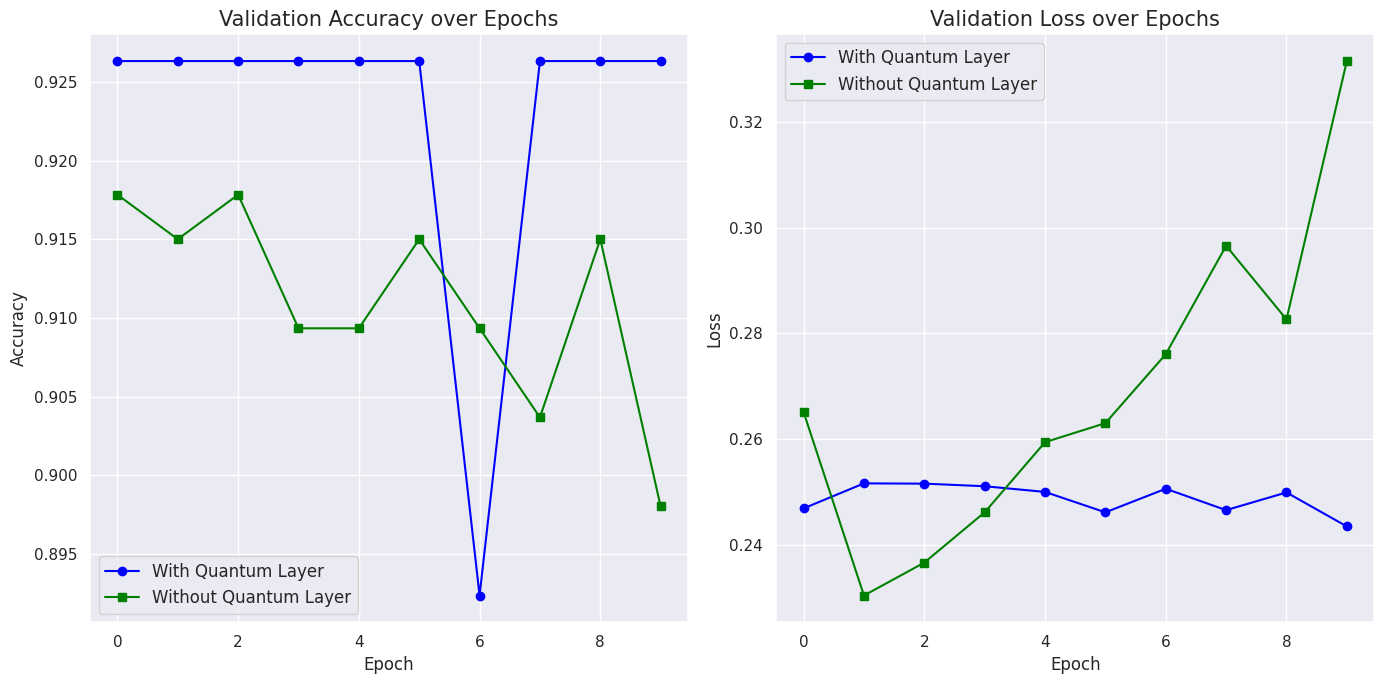

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
import pennylane as qml
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Define the reshape and pad function
def reshape_and_pad_data(data, new_shape):
    padded_data = []
    for sample in data:
        total_elements = new_shape[0] * new_shape[1]
        if total_elements >= sample.size:
            # Pad the sample with zeros to match the new shape
            padded_sample = np.pad(sample, (0, total_elements - sample.size), 'constant')
            reshaped_sample = padded_sample.reshape(new_shape)
        else:
            raise ValueError(f"New shape {new_shape} is too small for the sample size {sample.size}")
        padded_data.append(reshaped_sample)
    return np.array(padded_data)

# Define the new shape for reshaping
new_shape = (40, 40)  # Ensure this shape is large enough
if new_shape[0] * new_shape[1] < 1558:
    raise ValueError(f"New shape {new_shape} is too small for the feature size 1558")

# Reshape and pad the training and test data
X_train_reshaped = reshape_and_pad_data(X_train, new_shape)
X_test_reshaped = reshape_and_pad_data(X_test, new_shape)

# Define the quantum device and circuit
dev = qml.device("default.qubit", wires=4)

# Initialize the weights
np.random.seed(0)
weights = np.random.uniform(size=(1, 4, 3))

@qml.qnode(dev)
def circuit(inputs):
    qml.templates.AngleEmbedding(inputs, wires=range(4))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(4))
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

def quanv_layer(image):
    out = np.zeros((2, 2, 4))
    for i in range(2):
        for j in range(2):
            inputs = image[i:i+2, j:j+2].flatten()
            out[i, j, :] = circuit(inputs)
    return out

# Apply the quanvolutional layer to the reshaped training and testing data
X_train_quanv = np.array([quanv_layer(img) for img in X_train_reshaped])
X_test_quanv = np.array([quanv_layer(img) for img in X_test_reshaped])

# Flatten the output
X_train_flat = X_train_quanv.reshape(X_train_quanv.shape[0], -1)
X_test_flat = X_test_quanv.reshape(X_test_quanv.shape[0], -1)

# Prepare labels for neural network (adjust for binary classification)
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

# Define a classical neural network
def create_classical_nn(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the classical neural network with quantum features
input_shape = (X_train_flat.shape[1],)
model_with_quantum = create_classical_nn(input_shape, num_classes=2)
history_with_quantum = model_with_quantum.fit(X_train_flat, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test_flat, y_test_categorical))

# Train the classical neural network without quantum features (use original reshaped data)
X_train_reshaped_flat = X_train_reshaped.reshape(X_train_reshaped.shape[0], -1)
X_test_reshaped_flat = X_test_reshaped.reshape(X_test_reshaped.shape[0], -1)

input_shape_classical = (X_train_reshaped_flat.shape[1],)
model_without_quantum = create_classical_nn(input_shape_classical, num_classes=2)
history_without_quantum = model_without_quantum.fit(X_train_reshaped_flat, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test_reshaped_flat, y_test_categorical))

# Improved plotting using Seaborn
sns.set(style='darkgrid')
plt.figure(figsize=(14, 7))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_with_quantum.history['val_accuracy'], 'o-', label='With Quantum Layer', color='blue')
plt.plot(history_without_quantum.history['val_accuracy'], 's-', label='Without Quantum Layer', color='green')
plt.title('Validation Accuracy over Epochs', fontsize=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_with_quantum.history['val_loss'], 'o-', label='With Quantum Layer', color='blue')
plt.plot(history_without_quantum.history['val_loss'], 's-', label='Without Quantum Layer', color='green')
plt.title('Validation Loss over Epochs', fontsize=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()